In [1]:
%pip install -U numpy

Requirement already up-to-date: numpy in /opt/anaconda3/lib/python3.8/site-packages (1.24.4)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from linear_regression import LinearRegression

# force reimport linear regression
import importlib
import linear_regression
importlib.reload(linear_regression)
from linear_regression import LinearRegression

### MR22: 1D Example.

In [ ]:
np.random.seed(0)

total_observations = 1010
num_observations_pop_1 = 10 # A
num_observations_pop_2 = total_observations - num_observations_pop_1 # B

# Generate X values.
mean_pop_1 = np.array([-1])
mean_pop_2 = np.array([0])
vars_pop_1 = np.array([[0.25]])
vars_pop_2 = np.array([[0.25]])

x1 = np.random.multivariate_normal(mean_pop_1, vars_pop_1, num_observations_pop_1)
x2 = np.random.multivariate_normal(mean_pop_2, vars_pop_2, num_observations_pop_2)
x = np.append(x1, x2, axis=0)

# Add an intercept term.
df = pd.DataFrame(x)
df.insert(0, 'Ones', 1)
arr = df.values
x = arr
x1 = x[:10]
x2 = x[10:]

x1_0 = [pt[0] for pt in x1]
x1_1 = [pt[1] for pt in x1]
x2_0 = [pt[0] for pt in x2]
x2_1 = [pt[1] for pt in x2]

# Generate Y values.
epsilon1 = np.random.normal(0, 1, num_observations_pop_1)
slope1 = -1
intercept1 = 40
y1 = []
for i in range(num_observations_pop_1):
    y1.append(slope1*x1_1[i] + intercept1 + epsilon1[i])

epsilon2 = np.random.normal(0, 1, num_observations_pop_2)
slope2 = -1
intercept2 = 0
y2 = []
for i in range(num_observations_pop_2):
    y2.append(slope2*x2_1[i] + intercept2 + epsilon2[i])

y = np.concatenate([y1, y2], axis=0)

### Mar 14th: experimenting with smaller examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import linear_regression
from linear_regression import LinearRegression

In [3]:
np.random.seed(2)

# I. Generate the data.
num_dimensions = 2
# Mixing proportions
num_observations_pop_1 = 1 # A (small fraction)
num_observations_pop_2 = 3 # B

mean_pop_1 = np.array([-1, 0])
mean_pop_2 = np.array([0, 0])
vars_pop_1 = np.array([[.01, 0], [0, 1]])
vars_pop_2 = np.array([[0, 0], [0, 1]]) # when pop B is all zero, the line fits perfectly.

# generate the X values for two populations.
x1 = np.random.multivariate_normal(mean_pop_1, vars_pop_1, num_observations_pop_1)
x2 = np.random.multivariate_normal(mean_pop_2, vars_pop_2, num_observations_pop_2)
x = np.append(x1, x2, axis=0)


x1_0 = [pt[0] for pt in x1]
x1_1 = [pt[1] for pt in x1]
x2_0 = [pt[0] for pt in x2]
x2_1 = [pt[1] for pt in x2]

print(x1, "\n")
print(x2)

[[-1.00562668 -0.41675785]] 

[[ 0.         -2.1361961 ]
 [ 0.         -1.79343559]
 [ 0.          0.50288142]]


In [4]:
# Generating the Y values.
y1 = x1_0
y2 = np.random.randn(1, num_observations_pop_2) # No(0, 1)
y2 = y2[0] # format results of np.randn draw.
y = np.concatenate([y1, y2], axis=0)

In [6]:
y = [-1, 1.5, -0.5, 1] # pop A 1 point, pop B 2 points
x = np.array([[-1, 0.5], [0, -1], [0, 1], [0, 2]])

In [7]:
x.T @ x

array([[ 1.  , -0.5 ],
       [-0.5 ,  6.25]])

In [8]:
np.linalg.inv(x.T @ x)

array([[1.04166667, 0.08333333],
       [0.08333333, 0.16666667]])

In [9]:
x.T @ y

array([ 1. , -0.5])

In [10]:
np.linalg.inv(x.T @ x) @ x.T @ y

array([ 1.00000000e+00, -1.38777878e-17])

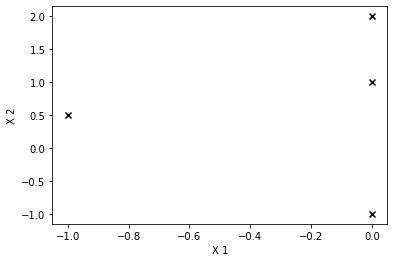

In [11]:
# X1 vs X2
x1 = [el[0] for el in x]
x2 = [el[1] for el in x]

plt.scatter(x1, x2, marker='x', color='black')
plt.xlabel('X 1')
plt.ylabel('X 2')

plt.show()

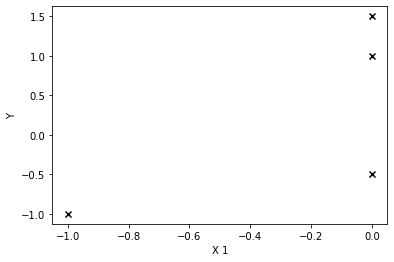

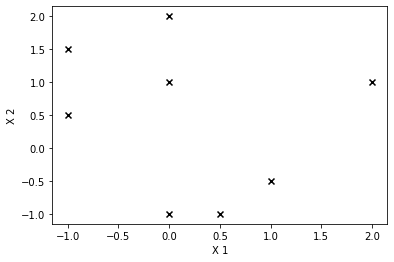

In [12]:
# X1 vs Y
plt.scatter(x1, y, marker='x', color='black')
plt.xlabel('X 1')
plt.ylabel('Y')

plt.show()

plt.scatter(x2, y, marker='x', color='black')
plt.xlabel('X 2')
plt.ylabel('Y')

plt.scatter(x1, x2, marker='x', color='black')
plt.xlabel('X 1')
plt.ylabel('X 2')

plt.show()

### Finite Sample Stability (def): the minimum number of samples (in a fractional sense) which need to be removed to zero out the first coordinate of the OLS regressor (MR22).

# I. Heterogeneous Data: Section 5.2 (MR22)

Smaller Population (A):

X1 ~ N(-1, 0.01)

X2 ~ N(0, 1)

y = X1

Larger Population (B):

X1 ~ N(0, 0)

X2 ~ N(0, 1)

y ~ N(0, 1)


In [5]:
np.random.seed(0)

# I. Generate the data.
num_dimensions = 2
total_observations = 1000
# Mixing proportions
num_observations_pop_1 = 10 # A (small fraction)
num_observations_pop_2 = total_observations - num_observations_pop_1 # B

mean_pop_1 = np.array([-1, 0])
mean_pop_2 = np.array([0, 0])
vars_pop_1 = np.array([[.01, 0], [0, 1]])
vars_pop_2 = np.array([[0, 0], [0, 1]]) # when pop B is all zero, the line fits perfectly.

# generate the X values for two populations.
x1 = np.random.multivariate_normal(mean_pop_1, vars_pop_1, num_observations_pop_1)
x2 = np.random.multivariate_normal(mean_pop_2, vars_pop_2, num_observations_pop_2)
x = np.append(x1, x2, axis=0)


x1_0 = [pt[0] for pt in x1]
x1_1 = [pt[1] for pt in x1]
x2_0 = [pt[0] for pt in x2]
x2_1 = [pt[1] for pt in x2]

In [6]:
# Generating the Y values.
y1 = x1_0
y2 = np.random.randn(1, num_observations_pop_2) # No(0, 1)
y2 = y2[0] # format results of np.randn draw.
y = np.concatenate([y1, y2], axis=0)  # All y samples

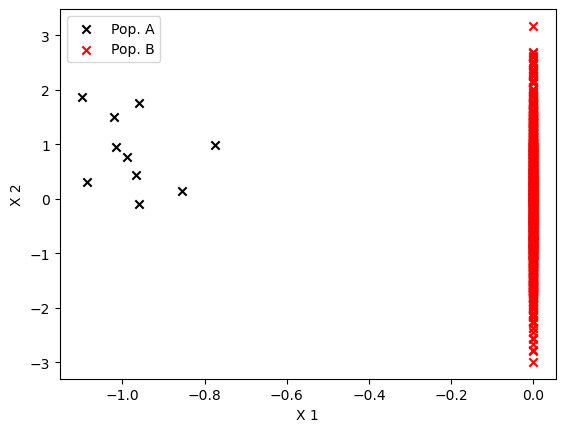

In [7]:
# X1 vs X2
plt.scatter(x1_0, x1_1, marker='x', color='black', label='Pop. A')
plt.scatter(x2_0, x2_1, marker='x', color='r', label='Pop. B')
plt.xlabel('X 1')
plt.ylabel('X 2')
plt.legend()

plt.show()

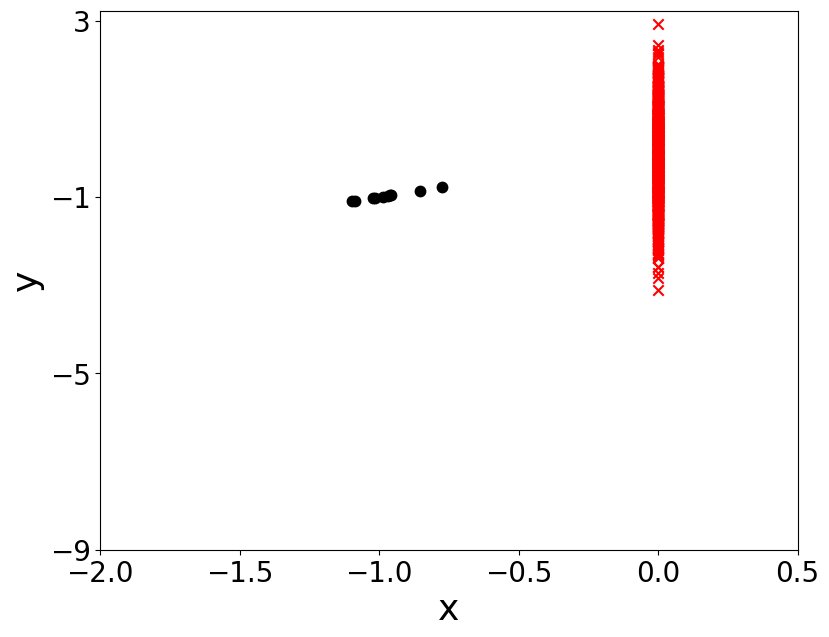

In [ ]:
plt.figure(figsize=(9, 7))
# X1 vs Y
plt.scatter(x1_0, y1, marker='o', color='black', s=56)
plt.scatter(x2_0, y2, marker='x', color='r', s=56)
# plt.xlabel('X 1')
# plt.ylabel('Y')
# plt.legend()
# plt.title("Multicollinearity Example (MR22)", fontsize=18)
plt.xlabel('x', fontsize=26)  # Larger font for x-axis label
plt.ylabel('y', fontsize=26)  # Larger font for y-axis label


plt.xlim(-1.5, 0.5)

# Set the size of tick marks
plt.xticks(np.arange(-2, 0.6, 0.5), fontsize=20)
plt.yticks(np.arange(-9, 6, 4), fontsize=20)

# Set the size of tick marks
# plt.xticks(np.arange(-1, 0.1, 0.5), fontsize=12)
# plt.yticks(np.arange(-3, 4, 2), fontsize=12) 

# plt.title('Multicollinearity Example (MR22)', fontsize=22)
# plt.legend(fontsize=22)
# plt.savefig('multicollinearity_mr22.pdf')

plt.show()

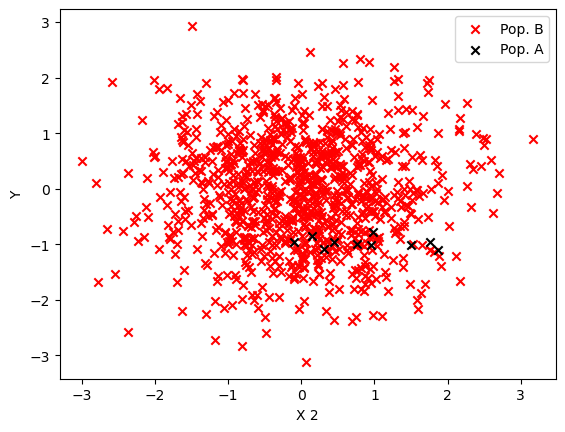

In [9]:
# X2 vs Y
plt.scatter(x2_1, y2, marker='x', color='r', label='Pop. B')
plt.scatter(x1_1, y1, marker='x', color='black', label='Pop. A')
plt.xlabel('X 2')
plt.ylabel('Y')
plt.legend()

plt.show()

In [10]:
# II. Fit the regression.
lr = LinearRegression(x=x.T, y=y)
lr.fit()

print(
    f"Estimated beta1 with full dataset: {lr.beta[0]}"
)  # We care about first coefficient (pop A: y is perfectly correlated (slope=1) with x1.)

modified_lr = LinearRegression(x=x2.T, y=y2)
modified_lr.fit()
print(
    f"Estimated beta2 with subset dropped: {modified_lr.beta[0]}"
)

modified_lr_a = LinearRegression(x=x1.T, y=y1)
modified_lr_a.fit()
print(
    f"Estimated beta2 with only pop A: {modified_lr_a.beta[0]}"
)

Estimated beta1 with full dataset: 0.994452751882396
Estimated beta2 with subset dropped: 0.0
Estimated beta2 with only pop A: 0.9999999999999997


In [11]:
print(np.linalg.cond(x))
print(np.linalg.cond(x1))
print(np.linalg.cond(x2)) # condition number with full data.

10.020339714181102
3.11949345138074
inf


In [12]:
# III. Compute influence scores for first coefficient.
scores = -lr.influence_scores()[0] # effect of removing a data point.
print("A", np.mean(np.abs(scores[:10])), "B", np.mean(np.abs(scores[10:1000])))

A 0.00035029010901665883 B 0.0005841278624252752


In [13]:
### Compute leverage and residuals.
residuals = lr.residual()
print("residuals", residuals[:10])
leverages = lr.leverage_scores()
print("leverages", leverages[:10])

residuals [ 0.00560874  0.00176228  0.0054862   0.00025766 -0.00595925 -0.00384771
 -0.00076266 -0.00261098  0.0035996  -0.00408057]
leverages [0.09748245 0.06320082 0.12715916 0.10803511 0.09738441 0.07696992
 0.10231614 0.09814458 0.10953937 0.12396841]


In [14]:
### Compute schmeverage scores.
schmeverages_e1 = lr.schmeverage_scores([(1,), (0,)])
schmerverages_e2 = lr.schmeverage_scores([(0,), (1,)])

In [15]:
# (3/12) average leverage and residual scores pop A vs. pop B
# print("A", np.mean(np.abs(leverages[:10])), "B", np.mean(np.abs(leverages[10:1000])))
print("Avg Residual A", np.mean(np.abs(residuals[:10])), "B", np.mean(np.abs(residuals[10:1000])))
print("Avg Schmeverage e1 A", np.mean(np.abs(schmeverages_e1[:10])), "B", np.mean(np.abs(schmeverages_e1[10:1000])))

Avg Residual A 0.003397566086729575 B 0.7762558307606898
Avg Schmeverage e1 A 0.10193661071546874 B 0.0007358252901541418


In [16]:
# sort indices in ascending order (influence scores are negative, so the largest magnitude scores appear first.)
inds = np.argsort(scores)

print("inds", inds[:10])
original_inds = inds

inds [264 628  10 891 109 769 512 370 207 874]


In [17]:
# sort scores.
sorted_scores = scores[inds]
# print("sorted_scores", sorted(scores)[:10])
original_sorted_scores = sorted_scores
print("original_sorted_scores:", original_sorted_scores[:10])

original_sorted_scores: [-0.00583765 -0.00449141 -0.0037555  -0.00342243 -0.00334078 -0.00325972
 -0.00311163 -0.00305021 -0.00287237 -0.00286927]


In [18]:
print(scores[10])
print(original_inds[:10]) # drop order.
print(original_sorted_scores[:10]) # influence scores sorted most negative first. 

-0.0037555043702114767
[264 628  10 891 109 769 512 370 207 874]
[-0.00583765 -0.00449141 -0.0037555  -0.00342243 -0.00334078 -0.00325972
 -0.00311163 -0.00305021 -0.00287237 -0.00286927]


In [19]:
x1 = [pt[0] for pt in x]
x2 = [pt[1] for pt in x]

In [20]:
# create a df with residuals, leverages, and coordinates.
orig_df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y, 
                                  'residual': residuals, 'leverage': leverages, 
                        'schmeverage_e1': schmeverages_e1, 'schmeverage_e2': schmerverages_e2,
                        'influence': scores})
orig_df[:10]

,x1,x2,y,residual,leverage,schmeverage_e1,schmeverage_e2,influence
0,-0.959984,1.764052,-0.959984,0.005609,0.097482,-0.099781,0.000960,0.000560
1,-0.775911,0.978738,-0.775911,0.001762,0.063201,-0.081073,0.000302,0.000143
2,-1.097728,1.867558,-1.097728,0.005486,0.127159,-0.114240,0.000939,0.000627
3,-1.015136,0.950088,-1.015136,0.000258,0.108035,-0.106383,0.000044,0.000027
4,-0.958940,-0.103219,-0.958940,-0.005959,0.097384,-0.101444,-0.001020,-0.000605
5,-0.854573,0.144044,-0.854573,-0.003848,0.076970,-0.090179,-0.000659,-0.000347
6,-0.987832,0.761038,-0.987832,-0.000763,0.102316,-0.103677,-0.000131,-0.000079
7,-0.966633,0.443863,-0.966633,-0.002611,0.098145,-0.101738,-0.000447,-0.000266
8,-1.020516,1.494079,-1.020516,0.003600,0.109539,-0.106435,0.000616,0.000383
9,-1.085410,0.313068,-1.085410,-0.004081,0.123968,-0.114415,-0.000699,-0.000467


#### Hat Matrix Algorithm

In [21]:
# compute the hat matrix
hat_matrix = x @ np.linalg.inv(x.T @ x) @ x.T
alphaN = 10

In [22]:
unique_indices, cross_leverages = lr.hat_matrix_algorithm(hat_matrix,alphaN)
print(f"Unique indices: {unique_indices}")
print(f"Cross-leverages: {cross_leverages}")

Unique indices: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Cross-leverages: [0.12715916453464507, 0.12429169727476931, 0.11798760787169618, 0.11686197816393162, 0.11356526026792224, 0.11132606303139124, 0.11084543008567888, 0.1097892634872436, 0.09776202202436905, 0.08955972848679693]


In [18]:
sorted_if_df = orig_df.sort_values(by='influence', ascending=True)
# sorted_if_df # the indices here are the order which amip drops points.

In [19]:
index = range(0, len(sorted_if_df))
sorted_if_df['sorted_idx'] = index
sorted_if_df

,x1,x2,y,residual,leverage,schmeverage_e1,schmeverage_e2,influence,sorted_idx
264,0.0,-2.369587,-2.579051,-2.593738,0.005959,-0.002251,-0.002515,-0.005838,0
628,0.0,-2.777359,-1.685382,-1.702597,0.008186,-0.002638,-0.002948,-0.004491,1
10,0.0,-2.552990,-1.532921,-1.548745,0.006917,-0.002425,-0.002709,-0.003756,2
891,0.0,-1.626322,-2.205505,-2.215586,0.002807,-0.001545,-0.001726,-0.003422,3
109,0.0,2.259309,1.542796,1.556800,0.005417,0.002146,0.002398,-0.003341,4
...,...,...,...,...,...,...,...,...,...
336,0.0,-1.945703,1.800463,1.788403,0.004018,-0.001848,-0.002065,0.003305,995
99,0.0,2.163236,-1.665956,-1.652548,0.004966,0.002055,0.002296,0.003395,996
599,0.0,-2.011880,1.959562,1.947092,0.004296,-0.001911,-0.002135,0.003721,997
70,0.0,-1.491258,2.929096,2.919853,0.002360,-0.001416,-0.001583,0.004136,998


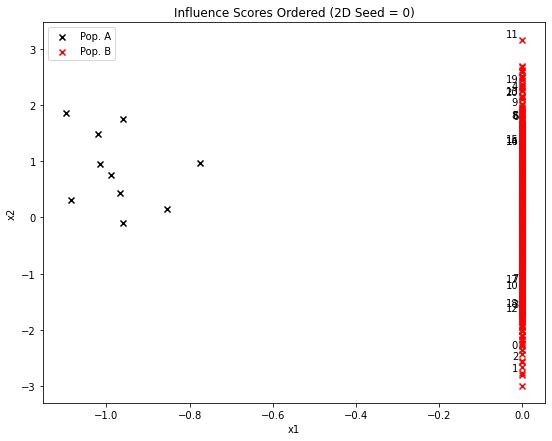

In [20]:
plt.figure(figsize=(9, 7))

plt.scatter(orig_df[:10]['x1'], orig_df[:10]['x2'], marker='x', color='black', label='Pop. A') # pop A
plt.scatter(orig_df[10:]['x1'], orig_df[10:]['x2'], marker='x', color='r', label='Pop. B') # pop B
   
# Add dropped order positioned by each point
for index, row in sorted_if_df.iterrows():
    if row['sorted_idx'] <= 20:
        plt.text(row['x1']-0.01, row['x2'], int(row['sorted_idx']), ha='right', va='bottom')


plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Influence Scores Ordered (2D Seed = 0)')
plt.legend()
plt.savefig('/Users/JennyH/Desktop/logistic reg plots/march2.plot2.jpeg')
plt.show()

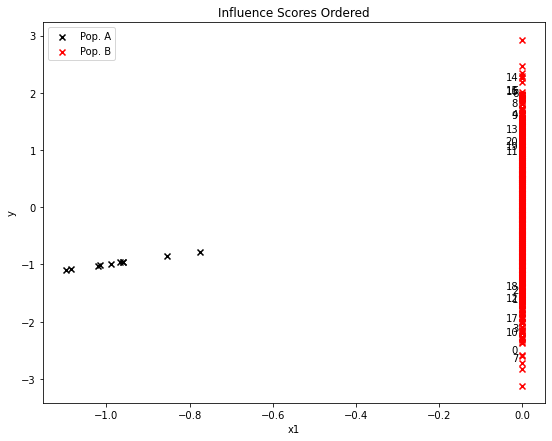

In [21]:
plt.figure(figsize=(9, 7))

plt.scatter(orig_df[:10]['x1'], orig_df[:10]['y'], marker='x', color='black', label='Pop. A') # pop A
plt.scatter(orig_df[10:]['x1'], orig_df[10:]['y'], marker='x', color='r', label='Pop. B') # pop B

    
# Add dropped order positioned by each point
for index, row in sorted_if_df.iterrows():
    if row['sorted_idx'] <= 20:
        plt.text(row['x1']-0.01, row['y'], int(row['sorted_idx']), ha='right', va='bottom')


plt.xlabel('x1')
plt.ylabel('y')
plt.title('Influence Scores Ordered')
plt.legend()
plt.savefig('/Users/JennyH/Desktop/logistic reg plots/march2.plot1.jpeg')
plt.show()

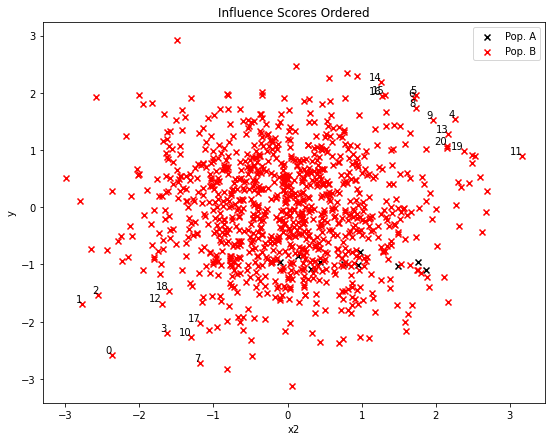

In [22]:
plt.figure(figsize=(9, 7))

plt.scatter(orig_df[:10]['x2'], orig_df[:10]['y'], marker='x', color='black', label='Pop. A') # pop A
plt.scatter(orig_df[10:]['x2'], orig_df[10:]['y'], marker='x', color='r', label='Pop. B') # pop B

    
# Add dropped order positioned by each point
for index, row in sorted_if_df.iterrows():
    if row['sorted_idx'] <= 20:
        plt.text(row['x2'], row['y'], int(row['sorted_idx']), ha='right', va='bottom')


plt.xlabel('x2')
plt.ylabel('y')
plt.title('Influence Scores Ordered')
plt.legend()
plt.savefig('/Users/JennyH/Desktop/logistic reg plots/march2.plot3.jpeg')
plt.show()

# plot of leverage (colored by ri and/or schmeverage ei(XtX)^-1xi - in e1 and e2 directions.)

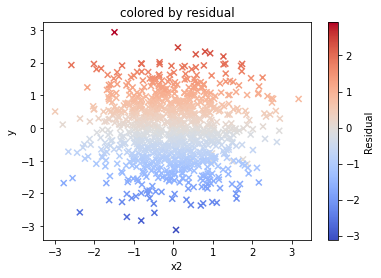

In [23]:
# RESIDUAL
cmap = plt.get_cmap('coolwarm')

# Normalize the residuals to lie between 0 and 1
norm = plt.Normalize(vmin=min(residuals), vmax=max(residuals))

# Scatter plot with color coded by residuals
plt.scatter(orig_df[:10]['x2'], orig_df[:10]['y'], c=orig_df[:10]['residual'], marker='x', cmap=cmap, norm=norm, label='Pop. A') # pop A
plt.scatter(orig_df[10:]['x2'], orig_df[10:]['y'], c=orig_df[10:1000]['residual'], marker='x', cmap=cmap, norm=norm, label='Pop. B') # pop B

# Add colorbar
plt.colorbar(label='Residual')

# Add labels and legend
plt.xlabel('x2')
plt.ylabel('y')
plt.title('colored by residual')


# Show plot
plt.show()

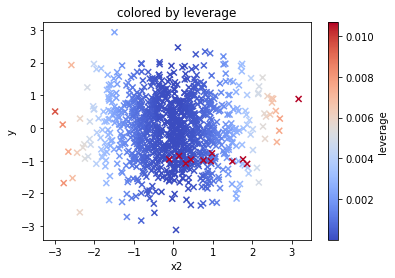

In [24]:
### LEVERAGE
cmap = plt.get_cmap('coolwarm')

# Normalize the schmeverages to lie between 0 and 1
norm = plt.Normalize(vmin=min(orig_df[10:1000]['leverage']), vmax=max(orig_df[10:1000]['leverage']))

# Scatter plot with color coded by residuals
plt.scatter(orig_df[10:]['x2'], orig_df[10:]['y'], c=orig_df[10:1000]['leverage'], marker='x', cmap=cmap, norm=norm, label='Pop. B') # pop B
plt.scatter(orig_df[:10]['x2'], orig_df[:10]['y'], c=orig_df[:10]['leverage'], marker='x', cmap=cmap, norm=norm, label='Pop. A') # pop A

# Add colorbar
plt.colorbar(label='leverage')

# Add labels and legend
plt.xlabel('x2')
plt.ylabel('y')
plt.title('colored by leverage')


# Show plot
plt.show()

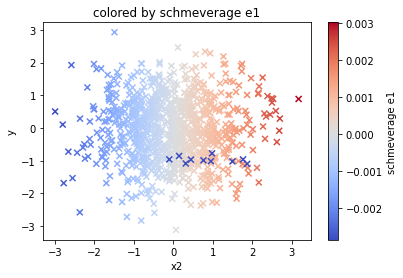

In [25]:
# SCHMEVERAGE e1
cmap = plt.get_cmap('coolwarm')

# Normalize the schmeverages to lie between 0 and 1
norm = plt.Normalize(vmin=min(orig_df[10:1000]['schmeverage_e1']), vmax=max(orig_df[10:1000]['schmeverage_e1']))

# Scatter plot with color coded by residuals
plt.scatter(orig_df[10:]['x2'], orig_df[10:]['y'], c=orig_df[10:1000]['schmeverage_e1'], marker='x', cmap=cmap, norm=norm, label='Pop. B') # pop B
plt.scatter(orig_df[:10]['x2'], orig_df[:10]['y'], c=orig_df[:10]['schmeverage_e1'], marker='x', cmap=cmap, norm=norm, label='Pop. A') # pop A

# Add colorbar
plt.colorbar(label='schmeverage e1')

# Add labels and legend
plt.xlabel('x2')
plt.ylabel('y')
plt.title('colored by schmeverage e1')


# Show plot
plt.show()

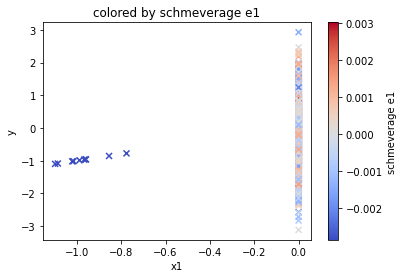

In [27]:
# SCHMEVERAGE e1
cmap = plt.get_cmap('coolwarm')

# Normalize the schmeverages to lie between 0 and 1
norm = plt.Normalize(vmin=min(orig_df[10:1000]['schmeverage_e1']), vmax=max(orig_df[10:1000]['schmeverage_e1']))

# Scatter plot with color coded by residuals
plt.scatter(orig_df[10:]['x1'], orig_df[10:]['y'], c=orig_df[10:1000]['schmeverage_e1'], marker='x', cmap=cmap, norm=norm, label='Pop. B') # pop B
plt.scatter(orig_df[:10]['x1'], orig_df[:10]['y'], c=orig_df[:10]['schmeverage_e1'], marker='x', cmap=cmap, norm=norm, label='Pop. A') # pop A

# Add colorbar
plt.colorbar(label='schmeverage e1')

# Add labels and legend
plt.xlabel('x1')
plt.ylabel('y')
plt.title('colored by schmeverage e1')


# Show plot
plt.show()


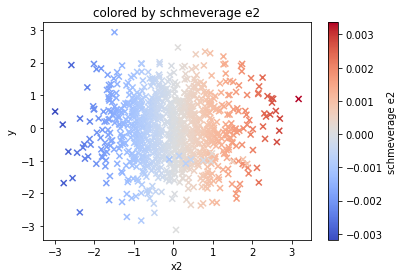

In [29]:
# SCHMEVERAGE e2
cmap = plt.get_cmap('coolwarm')

# Normalize the schmeverages to lie between 0 and 1
norm = plt.Normalize(vmin=min(orig_df[10:1000]['schmeverage_e2']), vmax=max(orig_df[10:1000]['schmeverage_e2']))

# Scatter plot with color coded by residuals
plt.scatter(orig_df[10:]['x2'], orig_df[10:]['y'], c=orig_df[10:1000]['schmeverage_e2'], marker='x', cmap=cmap, norm=norm, label='Pop. B') # pop B
plt.scatter(orig_df[:10]['x2'], orig_df[:10]['y'], c=orig_df[:10]['schmeverage_e2'], marker='x', cmap=cmap, norm=norm, label='Pop. A') # pop A

# Add colorbar
plt.colorbar(label='schmeverage e2')

# Add labels and legend
plt.xlabel('x2')
plt.ylabel('y')
plt.title('colored by schmeverage e2')


# Show plot
plt.show()

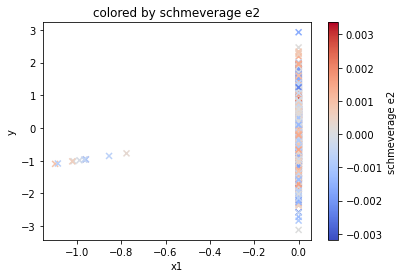

In [28]:
# SCHMEVERAGE e2
cmap = plt.get_cmap('coolwarm')

# Normalize the schmeverages to lie between 0 and 1
norm = plt.Normalize(vmin=min(orig_df[10:1000]['schmeverage_e2']), vmax=max(orig_df[10:1000]['schmeverage_e2']))

# Scatter plot with color coded by residuals
plt.scatter(orig_df[10:]['x1'], orig_df[10:]['y'], c=orig_df[10:1000]['schmeverage_e2'], marker='x', cmap=cmap, norm=norm, label='Pop. B') # pop B
plt.scatter(orig_df[:10]['x1'], orig_df[:10]['y'], c=orig_df[:10]['schmeverage_e2'], marker='x', cmap=cmap, norm=norm, label='Pop. A') # pop A

# Add colorbar
plt.colorbar(label='schmeverage e2')

# Add labels and legend
plt.xlabel('x1')
plt.ylabel('y')
plt.title('colored by schmeverage e2')


# Show plot
plt.show()

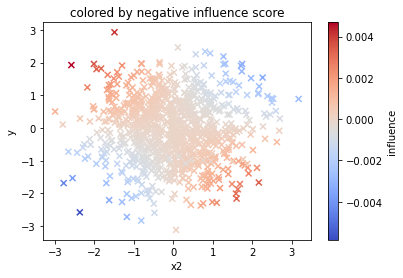

In [151]:
# INFLUENCE SCORE = -(schmeverage * residual)
cmap = plt.get_cmap('coolwarm')

# Normalize the schmeverages to lie between 0 and 1
norm = plt.Normalize(vmin=min(orig_df[10:1000]['influence']), vmax=max(orig_df[10:1000]['influence']))

# Scatter plot with color coded by residuals
plt.scatter(orig_df[10:]['x2'], orig_df[10:]['y'], c=orig_df[10:1000]['influence'], marker='x', cmap=cmap, norm=norm, label='Pop. B') # pop B
plt.scatter(orig_df[:10]['x2'], orig_df[:10]['y'], c=orig_df[:10]['influence'], marker='x', cmap=cmap, norm=norm, label='Pop. A') # pop A

# Add colorbar
plt.colorbar(label='influence')

# Add labels and legend
plt.xlabel('x2')
plt.ylabel('y')
plt.title('colored by negative influence score')


# Show plot
plt.show()

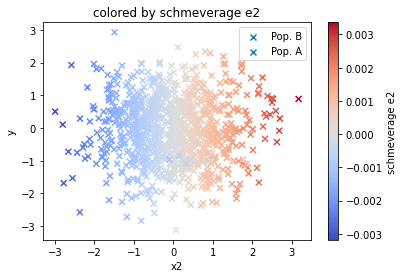

In [118]:
# SCHMEVERAGE e2
cmap = plt.get_cmap('coolwarm')

# Normalize the schmeverages to lie between 0 and 1
norm = plt.Normalize(vmin=min(orig_df[10:1000]['schmeverage_e2']), vmax=max(orig_df[10:1000]['schmeverage_e2']))

# Scatter plot with color coded by residuals
plt.scatter(orig_df[10:]['x2'], orig_df[10:]['y'], c=orig_df[10:1000]['schmeverage_e2'], marker='x', cmap=cmap, norm=norm, label='Pop. B') # pop B
plt.scatter(orig_df[:10]['x2'], orig_df[:10]['y'], c=orig_df[:10]['schmeverage_e2'], marker='x', cmap=cmap, norm=norm, label='Pop. A') # pop A
# Add colorbar
plt.colorbar(label='schmeverage e2')

# Add labels and legend
plt.xlabel('x2')
plt.ylabel('y')
plt.title('colored by schmeverage e2')
plt.legend()

# Show plot
plt.show()

In [119]:
# (3/6) the influence score is the -(schmeverage * residual).

orig_df[:10]['schmeverage_e1']*orig_df[:10]['residual']

0   -0.000560
1   -0.000143
2   -0.000627
3   -0.000027
4    0.000605
5    0.000347
6    0.000079
7    0.000266
8   -0.000383
9    0.000467
dtype: float64

In [120]:
orig_df[:10]['influence']

0    0.000560
1    0.000143
2    0.000627
3    0.000027
4   -0.000605
5   -0.000347
6   -0.000079
7   -0.000266
8    0.000383
9   -0.000467
Name: influence, dtype: float64

### Experimenting with Different DGPs

### IV. Hypothesis: Population B (the larger group) does not need to be exactly multicollinear.
What would happen if the variance of X1 in Pop. B were non-zero?

A: The smaller the variance (the more poorly conditioned the design matrix), the fewer the number of high influence points present in population A (the smaller group).

Even with very small non-zero variance, however, top influence scores now appear in population A. 

vars_pop_2 = np.array([[.001, 0], [0, 1]])


In [121]:
np.random.seed(0)

# I. Generate the data.
mean_pop_1 = np.array([-1, 0])
mean_pop_2 = np.array([0, 0])
vars_pop_1 = np.array([[.01, 0], [0, 1]])
vars_pop_2 = np.array([[.0001, 0], [0, 1]])

# generate the X values for two populations.
x1 = np.random.multivariate_normal(mean_pop_1, vars_pop_1, num_observations_pop_1)
x2 = np.random.multivariate_normal(mean_pop_2, vars_pop_2, num_observations_pop_2)
# x = np.concatenate([x1, x2], axis=-1)  # All x samples
x = np.append(x1, x2, axis=0)

x1_0 = [pt[0] for pt in x1]
x1_1 = [pt[1] for pt in x1]
x2_0 = [pt[0] for pt in x2]
x2_1 = [pt[1] for pt in x2]

# Generating the Y values.
y1 = x1_0
y2 = np.random.randn(1, num_observations_pop_2) # No(0, 1)
y2 = y2[0] # format results of np.randn draw.
y = np.concatenate([y1, y2], axis=0)  # All y samples

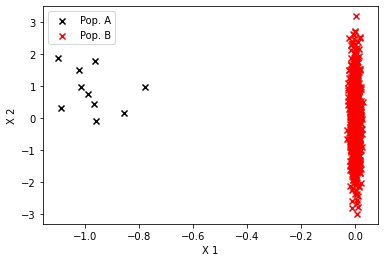

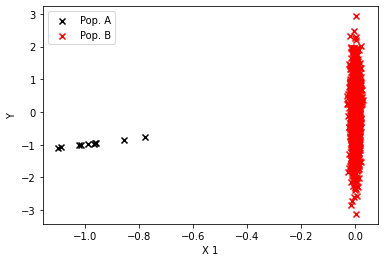

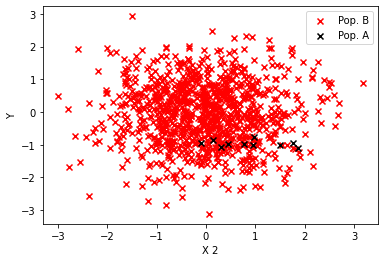

In [122]:
# X1 vs X2

plt.scatter(x1_0, x1_1, marker='x', color='black', label='Pop. A')
plt.scatter(x2_0, x2_1, marker='x', color='r', label='Pop. B')
plt.xlabel('X 1')
plt.ylabel('X 2')
plt.legend()

plt.show()

# X1 vs Y
plt.scatter(x1_0, y1, marker='x', color='black', label='Pop. A')
plt.scatter(x2_0, y2, marker='x', color='r', label='Pop. B')
plt.xlabel('X 1')
plt.ylabel('Y')
plt.legend()

plt.show()

# X2 vs Y
plt.scatter(x2_1, y2, marker='x', color='r', label='Pop. B')
plt.scatter(x1_1, y1, marker='x', color='black', label='Pop. A')
plt.xlabel('X 2')
plt.ylabel('Y')
plt.legend()

plt.show()

In [123]:
# II. Perform the regression.
lr = LinearRegression(x=x.T, y=y)
lr.fit()

print(
    f"Estimated beta1 with full dataset: {lr.beta[0]}"
)  # We care about first coefficient (pop A: y is perfectly correlated (slope=1) with x1.)

modified_lr = LinearRegression(x=x2.T, y=y2)
modified_lr.fit()
print(
    f"Estimated beta2 with subset dropped: {modified_lr.beta[0]}"
)

# III. Compute influence scores for first coefficient.
scores = -lr.influence_scores()[0] # effect of removing a data point.

Estimated beta1 with full dataset: 0.9701658281313709
Estimated beta2 with subset dropped: -1.4501608721406614


In [124]:
# III. Compute influence scores for first coefficient.
scores = -lr.influence_scores()[0] # effect of removing a data point.
print("A", np.mean(scores[:10]), "B", np.mean(scores[10:1000]))
print("A", np.min(scores[:10]), "B", np.max(scores[10:1000]))

A -0.0024003358044057737 B 2.4245816206119384e-05
A -0.0034462590221723617 B 0.0070617708893372455


In [125]:
### Leverage and Residual
residuals = lr.residual()
print("residuals", residuals[:10])
leverages = lr.leverage_scores()
print("leverages", leverages[:10])

# Get indices that sort them in ascending order (influence scores are negative, so the largest magnitude scores appear first.)
inds = np.argsort(scores)

print("inds", inds[:10])
original_inds = inds

# Sort the scores.
sorted_scores = scores[inds]
# print("sorted_scores", sorted(scores)[:10])
original_sorted_scores = sorted_scores
print("original_sorted_scores:", original_sorted_scores[:10])

residuals [-0.01757117 -0.01700722 -0.02103115 -0.02432407 -0.02925687 -0.02459162
 -0.02469577 -0.02605351 -0.02107112 -0.03041784]
leverages [0.09651519 0.06257292 0.12589629 0.10696425 0.09644027 0.07621768
 0.10130401 0.09717886 0.10845074 0.12275319]
inds [124 370 909 992 786 901 207 999 554 557]
original_sorted_scores: [-0.00652705 -0.00629828 -0.00471581 -0.00462172 -0.00436119 -0.00415992
 -0.00412552 -0.0038728  -0.00380095 -0.00379801]


In [126]:
# Create data frame of the points sorted (most negative influence first).
# separate out the x's
x1 = [pt[0] for pt in x]
x2 = [pt[1] for pt in x]

orig_df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y, 
                                  'residual': residuals, 'leverage': leverages, 'influence': scores})
orig_df[:11]

sorted_if_df = orig_df.sort_values(by='influence', ascending=True)
sorted_if_df # the indices here are the order which amip drops points.
index = range(0, len(sorted_if_df))
sorted_if_df['sorted_idx'] = index


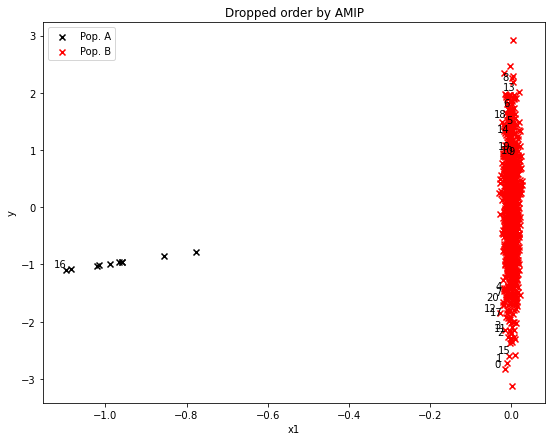

In [127]:
### V. Plot coordinates by AMIP drop order.
plt.figure(figsize=(9, 7))

plt.scatter(orig_df[:10]['x1'], orig_df[:10]['y'], marker='x', color='black', label='Pop. A') # pop A
plt.scatter(orig_df[10:]['x1'], orig_df[10:]['y'], marker='x', color='r', label='Pop. B') # pop B

    
# Add dropped order positioned by each point
for index, row in sorted_if_df.iterrows():
    if row['sorted_idx'] <= 20:
        plt.text(row['x1']-0.01, row['y'], int(row['sorted_idx']), ha='right', va='bottom')


plt.xlabel('x1')
plt.ylabel('y')
plt.title('Dropped order by AMIP')
plt.legend()
plt.savefig('/Users/JennyH/Desktop/logistic reg plots/march2.plot4.jpeg')
plt.show()

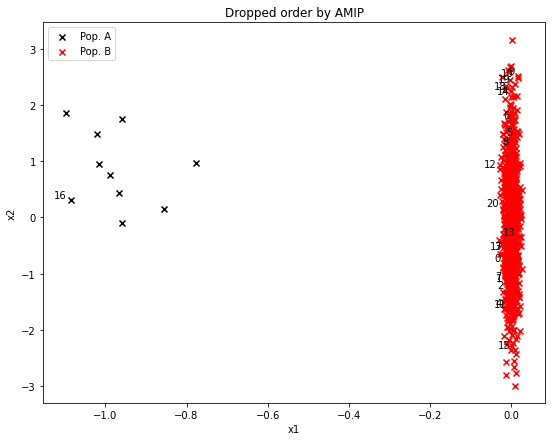

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

In [128]:
plt.figure(figsize=(9, 7))

plt.scatter(orig_df[:10]['x1'], orig_df[:10]['x2'], marker='x', color='black', label='Pop. A') # pop A
plt.scatter(orig_df[10:]['x1'], orig_df[10:]['x2'], marker='x', color='r', label='Pop. B') # pop B
   
# Add dropped order positioned by each point
for index, row in sorted_if_df.iterrows():
    if row['sorted_idx'] <= 20:
        plt.text(row['x1']-0.01, row['x2'], int(row['sorted_idx']), ha='right', va='bottom')


plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dropped order by AMIP')
plt.legend()
plt.savefig('/Users/JennyH/Desktop/logistic reg plots/march2.plot5.jpeg')
plt.show()

plt.figure(figsize=(9, 7))

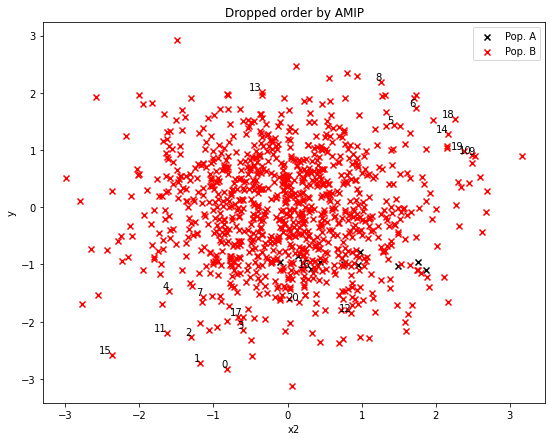

In [129]:
plt.figure(figsize=(9, 7))

plt.scatter(orig_df[:10]['x2'], orig_df[:10]['y'], marker='x', color='black', label='Pop. A') # pop A
plt.scatter(orig_df[10:]['x2'], orig_df[10:]['y'], marker='x', color='r', label='Pop. B') # pop B

    
# Add dropped order positioned by each point
for index, row in sorted_if_df.iterrows():
    if row['sorted_idx'] <= 20:
        plt.text(row['x2'], row['y'], int(row['sorted_idx']), ha='right', va='bottom')


plt.xlabel('x2')
plt.ylabel('y')
plt.title('Dropped order by AMIP')
plt.legend()
plt.savefig('/Users/JennyH/Desktop/logistic reg plots/march2.plot6.jpeg')
plt.show()

### V. Hypothesis: What role does the smaller population (A) play? We think the role is to make it such that, across all data, there is no multicollinearity.

What would happen if X1 in pop A were not correlated with Y?

A: The greater the correlation of X1 with Y in population A, the fewer the number of highly influence points found in population A.

Mathematical justification: Why does the first population have small influence? --> because the OLS regressor (on the whole data) can nearly interpolate the first subpopulation --> thus, pop A points have very small residual values. Despite having considerably larger (100x) leverage values, this does not counterbalance the small residual values. 

Smaller Population (A):

X1 ~ N(-1, 0.01)

X2 ~ N(0, 1)

y ~ N(0, 1)

Larger Population (B):

X1 ~ N(0, 0)

X2 ~ N(0, 1)

y ~ N(0, 1)

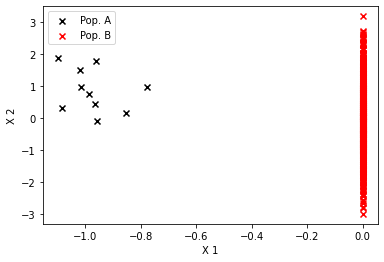

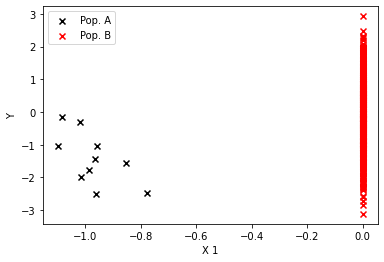

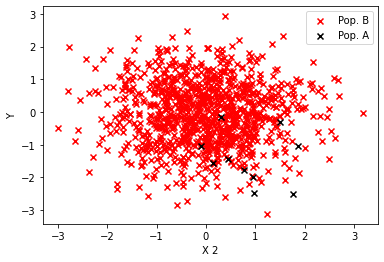

In [130]:
np.random.seed(0)

# I. Generate the data.
mean_pop_1 = np.array([-1, 0])
mean_pop_2 = np.array([0, 0])
vars_pop_1 = np.array([[.01, 0], [0, 1]])
vars_pop_2 = np.array([[0, 0], [0, 1]])

# generate the X values for two populations.
x1 = np.random.multivariate_normal(mean_pop_1, vars_pop_1, num_observations_pop_1)
x2 = np.random.multivariate_normal(mean_pop_2, vars_pop_2, num_observations_pop_2)
x = np.append(x1, x2, axis=0)

x1_0 = [pt[0] for pt in x1]
x1_1 = [pt[1] for pt in x1]
x2_0 = [pt[0] for pt in x2]
x2_1 = [pt[1] for pt in x2]

# Generating the Y values.
# y1 = np.random.randn(1, num_observations_pop_1) # No(0, 1)
epsilon = np.random.normal(0, 1, num_observations_pop_1)
y1 = x1_0 + epsilon # march 5, adding noise
# y1 = epsilon
y2 = np.random.randn(1, num_observations_pop_2) # No(0, 1)
y2 = y2[0] # format results of np.randn draw.
y = np.concatenate([y1, y2], axis=0)  # All y samples

# X1 vs X2

plt.scatter(x1_0, x1_1, marker='x', color='black', label='Pop. A')
plt.scatter(x2_0, x2_1, marker='x', color='r', label='Pop. B')
plt.xlabel('X 1')
plt.ylabel('X 2')
plt.legend()

plt.show()

# X1 vs Y
plt.scatter(x1_0, y1, marker='x', color='black', label='Pop. A')
plt.scatter(x2_0, y2, marker='x', color='r', label='Pop. B')
plt.xlabel('X 1')
plt.ylabel('Y')
plt.legend()

plt.show()

# X2 vs Y
plt.scatter(x2_1, y2, marker='x', color='r', label='Pop. B')
plt.scatter(x1_1, y1, marker='x', color='black', label='Pop. A')
plt.xlabel('X 2')
plt.ylabel('Y')
plt.legend()

plt.show()

In [131]:
# II. Perform the regression.
lr = LinearRegression(x=x.T, y=y)
lr.fit()

print(
    f"Estimated beta1 with full dataset: {lr.beta[0]}"
)  # We care about first coefficient (pop A: y is perfectly correlated (slope=1) with x1.)

modified_lr = LinearRegression(x=x2.T, y=y2)
modified_lr.fit()
print(
    f"Estimated beta2 with subset dropped: {modified_lr.beta[0]}"
)

# III. Compute influence scores for first coefficient.
scores = -lr.influence_scores()[0] # effect of removing a data point.

# III. Compute influence scores for first coefficient.
scores = -lr.influence_scores()[0] # effect of removing a data point.
print("A", np.mean(scores[:10]), "B", np.mean(scores[10:1000]))
print("A", np.min(scores[:10]), "B", np.max(scores[10:1000]))

### Leverage and Residual
residuals = lr.residual()
print("residuals", residuals[:10])
leverages = lr.leverage_scores()
print("leverages", leverages[:10])

# Get indices that sort them in ascending order (influence scores are negative, so the largest magnitude scores appear first.)
inds = np.argsort(scores)

print("inds", inds[:10])
original_inds = inds

# Sort the scores.
sorted_scores = scores[inds]
# print("sorted_scores", sorted(scores)[:10])
original_sorted_scores = sorted_scores
print("original_sorted_scores:", original_sorted_scores[:10])

Estimated beta1 with full dataset: 1.4047919533752333
Estimated beta2 with subset dropped: 0.0
A 0.00011830653253673551 B -1.1950154801686689e-06
A -0.11336527286057387 B 0.005173625726133985
residuals [-1.13613894 -1.39334476  0.49915508 -0.54304568  0.30688053 -0.3572663
 -0.36738514 -0.08749998  1.12361722  1.36996338]
leverages [0.09748245 0.06320082 0.12715916 0.10803511 0.09738441 0.07696992
 0.10231614 0.09814458 0.10953937 0.12396841]
inds [  0   1   3   6   5   7 264 806 881 861]
original_sorted_scores: [-0.11336527 -0.11296279 -0.05777083 -0.03808939 -0.03221805 -0.00890205
 -0.00416188 -0.0040325  -0.00377898 -0.00347696]


In [132]:
# Create data frame of the points sorted (most negative influence first).
# separate out the x's
x1 = [pt[0] for pt in x]
x2 = [pt[1] for pt in x]

orig_df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y, 
                                  'residual': residuals, 'leverage': leverages, 'influence': scores})
orig_df[:11]

sorted_if_df = orig_df.sort_values(by='influence', ascending=True)
sorted_if_df # the indices here are the order which amip drops points.
index = range(0, len(sorted_if_df))
sorted_if_df['sorted_idx'] = index

sorted_if_df

,x1,x2,y,residual,leverage,influence,sorted_idx
0,-0.959984,1.764052,-2.492905,-1.136139,0.097482,-0.113365,0
1,-0.775911,0.978738,-2.487881,-1.393345,0.063201,-0.112963,1
3,-1.015136,0.950088,-1.973510,-0.543046,0.108035,-0.057771,2
6,-0.987832,0.761038,-1.758617,-0.367385,0.102316,-0.038089,3
5,-0.854573,0.144044,-1.558432,-0.357266,0.076970,-0.032218,4
...,...,...,...,...,...,...,...
628,0.000000,-2.777359,1.974100,1.961208,0.008186,0.005174,995
4,-0.958940,-0.103219,-1.039752,0.306881,0.097384,0.031131,996
2,-1.097728,1.867558,-1.051593,0.499155,0.127159,0.057024,997
8,-1.020516,1.494079,-0.316930,1.123617,0.109539,0.119592,998


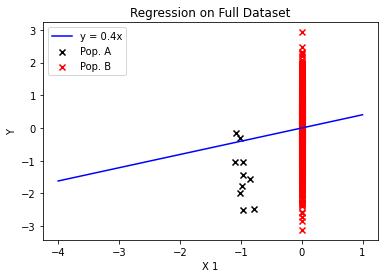

In [133]:
# Scatter plots
plt.scatter(x1_0, y1, marker='x', color='black', label='Pop. A')
plt.scatter(x2_0, y2, marker='x', color='r', label='Pop. B')
# Line plot
x_values = range(-4, 2)  # Range of x values for the line
y_values = [0.405 * x for x in x_values]  # Corresponding y values for the line
plt.plot(x_values, y_values, color='blue', label='y = 0.4x')  # Plot the line

# Labels and legend
plt.xlabel('X 1')
plt.ylabel('Y')
plt.title('Regression on Full Dataset')
plt.legend()

# Show the plot
plt.show()

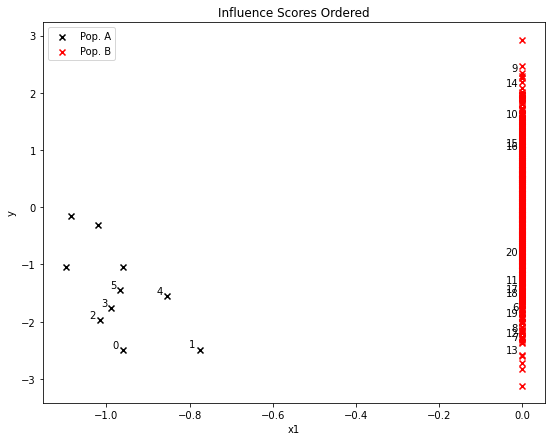

In [134]:
### III. Plot coordinates by AMIP drop order.
plt.figure(figsize=(9, 7))

plt.scatter(orig_df[:10]['x1'], orig_df[:10]['y'], marker='x', color='black', label='Pop. A') # pop A
plt.scatter(orig_df[10:]['x1'], orig_df[10:]['y'], marker='x', color='r', label='Pop. B') # pop B

    
# Add dropped order positioned by each point
for index, row in sorted_if_df.iterrows():
    if row['sorted_idx'] <= 20:
        plt.text(row['x1']-0.01, row['y'], int(row['sorted_idx']), ha='right', va='bottom')


plt.xlabel('x1')
plt.ylabel('y')
plt.title('Influence Scores Ordered')
plt.legend()
plt.savefig('/Users/JennyH/Desktop/logistic reg plots/march2.plot7.jpeg')
plt.show()


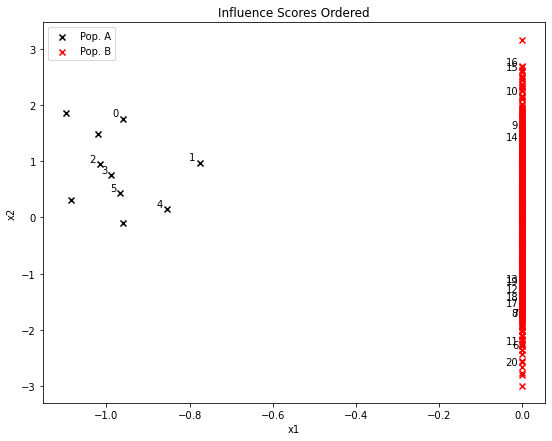

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

In [135]:
plt.figure(figsize=(9, 7))

plt.scatter(orig_df[:10]['x1'], orig_df[:10]['x2'], marker='x', color='black', label='Pop. A') # pop A
plt.scatter(orig_df[10:]['x1'], orig_df[10:]['x2'], marker='x', color='r', label='Pop. B') # pop B
   
# Add dropped order positioned by each point
for index, row in sorted_if_df.iterrows():
    if row['sorted_idx'] <= 20:
        plt.text(row['x1']-0.01, row['x2'], int(row['sorted_idx']), ha='right', va='bottom')


plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Influence Scores Ordered')
plt.legend()
plt.savefig('/Users/JennyH/Desktop/logistic reg plots/march2.plot8.jpeg')
plt.show()

plt.figure(figsize=(9, 7))

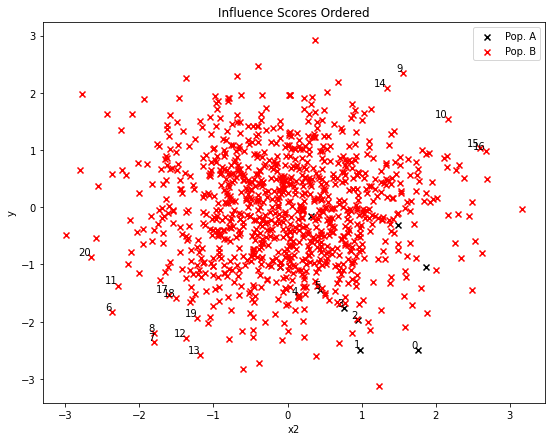

In [136]:
plt.figure(figsize=(9, 7))

plt.scatter(orig_df[:10]['x2'], orig_df[:10]['y'], marker='x', color='black', label='Pop. A') # pop A
plt.scatter(orig_df[10:]['x2'], orig_df[10:]['y'], marker='x', color='r', label='Pop. B') # pop B

    
# Add dropped order positioned by each point
for index, row in sorted_if_df.iterrows():
    if row['sorted_idx'] <= 20:
        plt.text(row['x2'], row['y'], int(row['sorted_idx']), ha='right', va='bottom')


plt.xlabel('x2')
plt.ylabel('y')
plt.title('Influence Scores Ordered')
plt.legend()
plt.savefig('/Users/JennyH/Desktop/logistic reg plots/march2.plot9.jpeg')
plt.show()

### VI. Will increasing the variance in Y in population B increase the residuals of population A?

In [64]:
np.random.seed(0)

# I. Generate the data.
mean_pop_1 = np.array([-1, 0])
mean_pop_2 = np.array([0, 0])
vars_pop_1 = np.array([[.01, 0], [0, 1]])
vars_pop_2 = np.array([[0, 0], [0, 1]])

# generate the X values for two populations.
x1 = np.random.multivariate_normal(mean_pop_1, vars_pop_1, num_observations_pop_1)
x2 = np.random.multivariate_normal(mean_pop_2, vars_pop_2, num_observations_pop_2)
x = np.append(x1, x2, axis=0)

x1_0 = [pt[0] for pt in x1]
x1_1 = [pt[1] for pt in x1]
x2_0 = [pt[0] for pt in x2]
x2_1 = [pt[1] for pt in x2]

# Generating the Y values.
# y1 = np.random.randn(1, num_observations_pop_1) # No(0, 1)
epsilon = np.random.normal(0, 1, num_observations_pop_1)
y1 = x1_0 + epsilon # march 5, adding noise
# y1 = epsilon
y2 = np.random.normal(0, 100, num_observations_pop_2) # No(0, 10)
# y2 = y2[0] # format results of np.randn draw.
y = np.concatenate([y1, y2], axis=0)  # All y samples

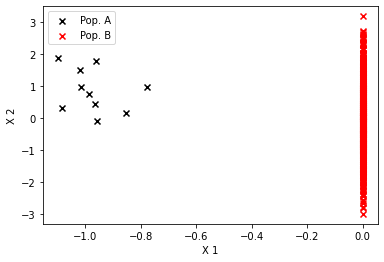

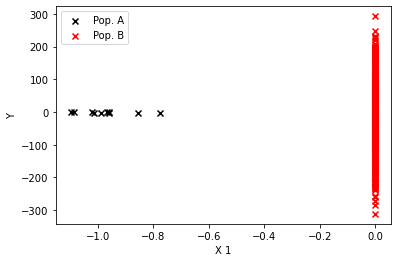

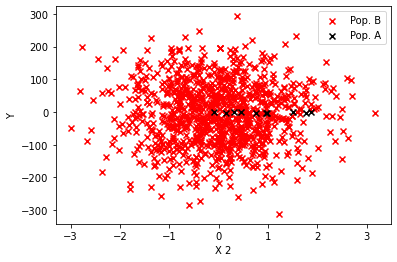

In [65]:
# X1 vs X2

plt.scatter(x1_0, x1_1, marker='x', color='black', label='Pop. A')
plt.scatter(x2_0, x2_1, marker='x', color='r', label='Pop. B')
plt.xlabel('X 1')
plt.ylabel('X 2')
plt.legend()

plt.show()

# X1 vs Y
plt.scatter(x1_0, y1, marker='x', color='black', label='Pop. A')
plt.scatter(x2_0, y2, marker='x', color='r', label='Pop. B')
plt.xlabel('X 1')
plt.ylabel('Y')
plt.legend()

plt.show()

# X2 vs Y
plt.scatter(x2_1, y2, marker='x', color='r', label='Pop. B')
plt.scatter(x1_1, y1, marker='x', color='black', label='Pop. A')
plt.xlabel('X 2')
plt.ylabel('Y')
plt.legend()

plt.show()

In [66]:
# II. Perform the regression.
lr = LinearRegression(x=x.T, y=y)
lr.fit()

print(
    f"Estimated beta1 with full dataset: {lr.beta[0]}"
)  # We care about first coefficient (pop A: y is perfectly correlated (slope=1) with x1.)

modified_lr = LinearRegression(x=x2.T, y=y2)
modified_lr.fit()
print(
    f"Estimated beta2 with subset dropped: {modified_lr.beta[0]}"
)

Estimated beta1 with full dataset: 1.112377865407519
Estimated beta2 with subset dropped: 0.0


In [67]:
### Average Leverage and Residual
residuals = lr.residual()
print("A", np.mean(np.abs(residuals[:10])), "B", np.mean(np.abs(residuals[10:1000])))

leverages = lr.leverage_scores()
print("A", np.mean(leverages[:10]), "B", np.mean(leverages[10:1000]))

A 0.712703874979437 B 77.56702046109953
A 0.10042003796014147 B 0.001005858202422813


In [68]:
# III. Compute influence scores for first coefficient.
scores = -lr.influence_scores()[0] # effect of removing a data point.

scores = -lr.influence_scores()[0] # effect of removing a data point.
print("A", np.mean(np.abs(scores[:10])), "B", np.mean(np.abs(scores[10:1000])))

A 0.07240111891157296 B 0.05713807200504075


In [69]:
# Get indices that sort them in ascending order (influence scores are negative, so the largest magnitude scores appear first.)
inds = np.argsort(scores)

print("inds", inds[:10])
original_inds = inds

# Sort the scores.
sorted_scores = scores[inds]
# print("sorted_scores", sorted(scores)[:10])
original_sorted_scores = sorted_scores
print("original_sorted_scores:", original_sorted_scores[:10])

inds [264 806 881 861  99 234 701 254 995 449]
original_sorted_scores: [-0.41548024 -0.40284246 -0.37749076 -0.34738813 -0.31846737 -0.29942405
 -0.29693651 -0.28928678 -0.26571295 -0.25690877]


In [70]:
# Create data frame of the points sorted (most negative influence first).
# separate out the x's
x1 = [pt[0] for pt in x]
x2 = [pt[1] for pt in x]

orig_df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y, 
                                  'residual': residuals, 'leverage': leverages, 'influence': scores})
orig_df[:11]

sorted_if_df = orig_df.sort_values(by='influence', ascending=True)
sorted_if_df # the indices here are the order which amip drops points.
index = range(0, len(sorted_if_df))
sorted_if_df['sorted_idx'] = index

sorted_if_df[:10] # (3/12: we get some extremely large residuals in population B, resulting in the highest influence
# points belonging to population B.)

,x1,x2,y,residual,leverage,influence,sorted_idx
264,0.0,-2.369587,-183.817674,-184.602888,0.005959,-0.415480,0
806,0.0,-1.797456,-235.364040,-235.959666,0.003429,-0.402842,1
881,0.0,-1.797165,-220.550536,-221.146065,0.003428,-0.377491,2
861,0.0,1.561280,233.740966,234.258330,0.002587,-0.347388,3
99,0.0,2.163236,154.279634,154.996469,0.004966,-0.318467,4
234,0.0,-2.288620,-136.985950,-137.744334,0.005559,-0.299424,5
701,0.0,-1.365163,-228.549945,-229.002321,0.001978,-0.296937,6
254,0.0,-1.179158,-257.905075,-258.295814,0.001476,-0.289287,7
995,0.0,1.342622,207.917666,208.362573,0.001913,-0.265713,8
449,0.0,2.594425,103.395699,104.255417,0.007144,-0.256909,9


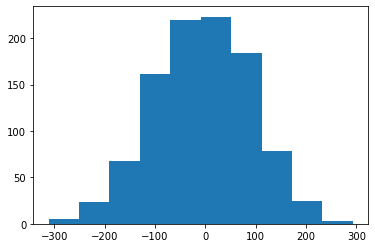

In [71]:
plt.hist(orig_df['residual'][10:1000], label="pop. B")
plt.show()

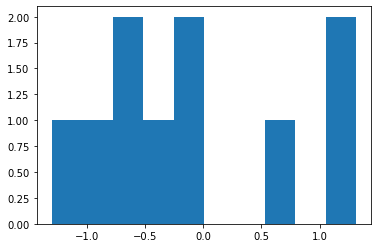

In [72]:
plt.hist(orig_df['residual'][0:10], label="pop. A")

plt.show()

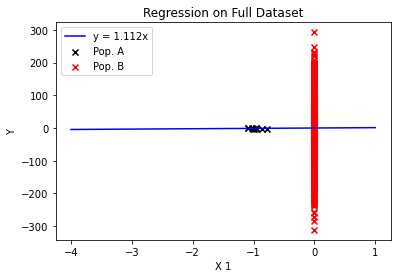

In [73]:
# Scatter plots
plt.scatter(x1_0, y1, marker='x', color='black', label='Pop. A')
plt.scatter(x2_0, y2, marker='x', color='r', label='Pop. B')
# Line plot
x_values = range(-4, 2)  # Range of x values for the line
y_values = [ 1.112 * x for x in x_values]  # Corresponding y values for the line
plt.plot(x_values, y_values, color='blue', label='y = 1.112x')  # Plot the line

# Labels and legend
plt.xlabel('X 1')
plt.ylabel('Y')
plt.title('Regression on Full Dataset')
plt.legend()

# Show the plot
plt.show()

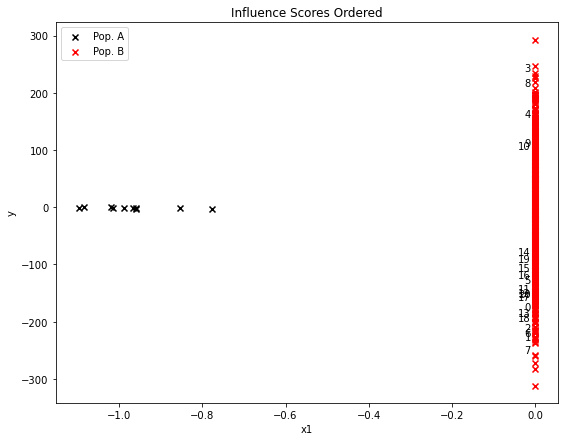

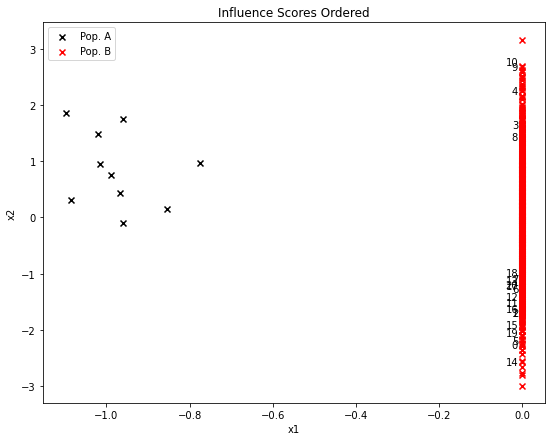

<Figure size 648x504 with 0 Axes>

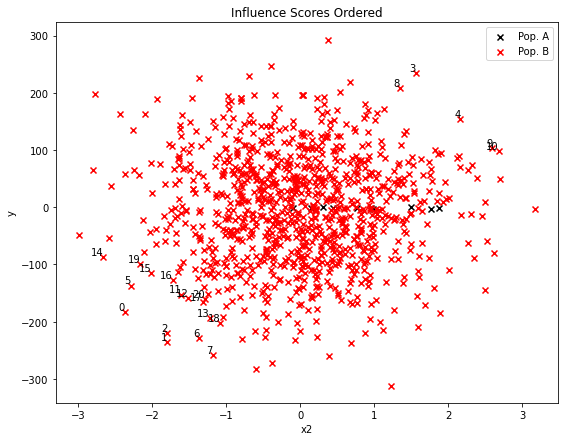

In [74]:
### III. Plot coordinates by AMIP drop order.
plt.figure(figsize=(9, 7))

plt.scatter(orig_df[:10]['x1'], orig_df[:10]['y'], marker='x', color='black', label='Pop. A') # pop A
plt.scatter(orig_df[10:]['x1'], orig_df[10:]['y'], marker='x', color='r', label='Pop. B') # pop B

    
# Add dropped order positioned by each point
for index, row in sorted_if_df.iterrows():
    if row['sorted_idx'] <= 20:
        plt.text(row['x1']-0.01, row['y'], int(row['sorted_idx']), ha='right', va='bottom')


plt.xlabel('x1')
plt.ylabel('y')
plt.title('Influence Scores Ordered')
plt.legend()
plt.show()

# (3/6): tightly clustered data to keep the small residual.
# it takes small residual + poor conditioning of the design matrix in order for the influence scores not to capture
# the smaller population.
# If we move to a higher dimension, could we get away with larger residuals?
# Scale up the variance of y's in pop B.
# Is there a similar version of this problem in logistic regression? higher dimensions?

# influence function form for GPs (replace the covariance matrix).
# higher dimensions (model is high dimensional) but regularization

plt.figure(figsize=(9, 7))

plt.scatter(orig_df[:10]['x1'], orig_df[:10]['x2'], marker='x', color='black', label='Pop. A') # pop A
plt.scatter(orig_df[10:]['x1'], orig_df[10:]['x2'], marker='x', color='r', label='Pop. B') # pop B
   
# Add dropped order positioned by each point
for index, row in sorted_if_df.iterrows():
    if row['sorted_idx'] <= 20:
        plt.text(row['x1']-0.01, row['x2'], int(row['sorted_idx']), ha='right', va='bottom')


plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Influence Scores Ordered')
plt.legend()
plt.show()

plt.figure(figsize=(9, 7))

plt.figure(figsize=(9, 7))

plt.scatter(orig_df[:10]['x2'], orig_df[:10]['y'], marker='x', color='black', label='Pop. A') # pop A
plt.scatter(orig_df[10:]['x2'], orig_df[10:]['y'], marker='x', color='r', label='Pop. B') # pop B

    
# Add dropped order positioned by each point
for index, row in sorted_if_df.iterrows():
    if row['sorted_idx'] <= 20:
        plt.text(row['x2'], row['y'], int(row['sorted_idx']), ha='right', va='bottom')


plt.xlabel('x2')
plt.ylabel('y')
plt.title('Influence Scores Ordered')
plt.legend()
plt.show()

### Would making pop. A a small blob lead to (rather than perfect linearity) a more realistic case of small residuals? (3/6)

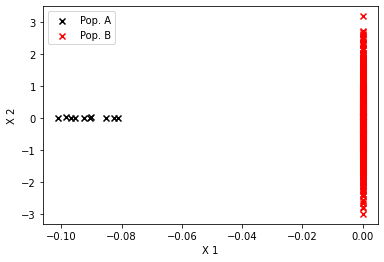

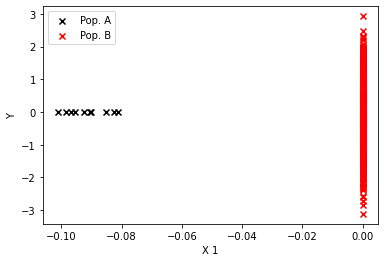

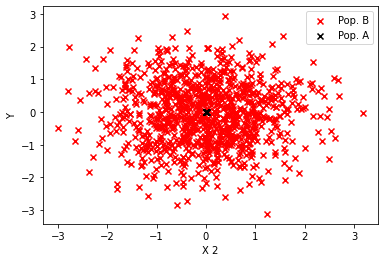

In [80]:
### VI. Will increasing the variance in Y in population B increase the residuals of population A?

np.random.seed(0)

# I. Generate the data.
mean_pop_1 = np.array([-0.1, 0])
mean_pop_2 = np.array([0, 0])
vars_pop_1 = np.array([[.0001, 0], [0, .0001]])
vars_pop_2 = np.array([[0, 0], [0, 1]])

# generate the X values for two populations.
x1 = np.random.multivariate_normal(mean_pop_1, vars_pop_1, num_observations_pop_1)
x2 = np.random.multivariate_normal(mean_pop_2, vars_pop_2, num_observations_pop_2)
x = np.append(x1, x2, axis=0)

x1_0 = [pt[0] for pt in x1]
x1_1 = [pt[1] for pt in x1]
x2_0 = [pt[0] for pt in x2]
x2_1 = [pt[1] for pt in x2]

# Generating the Y values.
# y1 = np.random.randn(1, num_observations_pop_1) # No(0, 1)
epsilon = np.random.normal(0, 0.001, num_observations_pop_1)
# y1 = x1_0 + epsilon # march 5, adding noise
y1 = epsilon

y2 = np.random.normal(0, 1, num_observations_pop_2) # No(0, 10)
# y2 = y2[0] # format results of np.randn draw.
y = np.concatenate([y1, y2], axis=0)  # All y samples

# X1 vs X2

plt.scatter(x1_0, x1_1, marker='x', color='black', label='Pop. A')
plt.scatter(x2_0, x2_1, marker='x', color='r', label='Pop. B')
plt.xlabel('X 1')
plt.ylabel('X 2')
plt.legend()

plt.show()

# X1 vs Y
plt.scatter(x1_0, y1, marker='x', color='black', label='Pop. A')
plt.scatter(x2_0, y2, marker='x', color='r', label='Pop. B')
plt.xlabel('X 1')
plt.ylabel('Y')
plt.legend()

plt.show()

# X2 vs Y
plt.scatter(x2_1, y2, marker='x', color='r', label='Pop. B')
plt.scatter(x1_1, y1, marker='x', color='black', label='Pop. A')
plt.xlabel('X 2')
plt.ylabel('Y')
plt.legend()

plt.show()

In [81]:
# II. Perform the regression.
lr = LinearRegression(x=x.T, y=y)
lr.fit()

print(
    f"Estimated beta1 with full dataset: {lr.beta[0]}"
)  # We care about first coefficient (pop A: y is perfectly correlated (slope=1) with x1.)

modified_lr = LinearRegression(x=x2.T, y=y2)
modified_lr.fit()
print(
    f"Estimated beta2 with subset dropped: {modified_lr.beta[0]}"
)

# III. Compute influence scores for first coefficient.
scores = -lr.influence_scores()[0] # effect of removing a data point.


Estimated beta1 with full dataset: 0.004760699860069049
Estimated beta2 with subset dropped: 0.0


In [82]:
### (3/12) Average Leverage and Residual
residuals = lr.residual()
print("residuals A", np.mean(np.abs(residuals[:10])), "B", np.mean(np.abs(residuals[10:1000])))

schmeverages_e1 = lr.schmeverage_scores([(1,), (0,)])
print("schmeverage e1 A", np.mean(np.abs(leverages[:10])), "B", np.mean(np.abs(leverages[10:1000])))

# Compute influence scores for first coefficient.
scores = -lr.influence_scores()[0] # effect of removing a data point.
print("influences A", np.mean(np.abs(scores[:10])), "B", np.mean(np.abs(scores[10:1000])))

residuals A 0.0006674973488900906 B 0.7756702100698616
schmeverage e1 A 0.10042003796014147 B 0.001005858202422813
influences A 0.0007149903283727915 B 2.060091275910991e-05


In [83]:
# Get indices that sort them in ascending order (influence scores are negative, so the largest magnitude scores appear first.)
inds = np.argsort(scores)

print("inds", inds[:10])
original_inds = inds

# Sort the scores.
sorted_scores = scores[inds]
# print("sorted_scores", sorted(scores)[:10])
original_sorted_scores = sorted_scores
print("original_sorted_scores:", original_sorted_scores[:10])

# Create data frame of the points sorted (most negative influence first).
# separate out the x's
x1 = [pt[0] for pt in x]
x2 = [pt[1] for pt in x]

inds [  1   0   3   6   5 264 806 881 861  99]
original_sorted_scores: [-0.00129862 -0.00110643 -0.00057421 -0.00035985 -0.00021894 -0.0001498
 -0.00014524 -0.0001361  -0.00012525 -0.00011482]


In [84]:
orig_df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y, 
                                  'residual': residuals, 'leverage': leverages, 'influence': scores})
orig_df[:11]

sorted_if_df = orig_df.sort_values(by='influence', ascending=True)
sorted_if_df # the indices here are the order which amip drops points.
index = range(0, len(sorted_if_df))
sorted_if_df['sorted_idx'] = index

sorted_if_df[:10]

,x1,x2,y,residual,leverage,influence,sorted_idx
1,-0.090213,0.022409,-0.001712,-0.001208,0.063201,-0.001299,0
0,-0.082359,0.004002,-0.001533,-0.001128,0.097482,-0.001106,1
3,-0.090499,-0.001514,-0.000958,-0.000533,0.108035,-0.000574,2
6,-0.092390,0.001217,-0.000771,-0.000327,0.102316,-0.000360,3
5,-0.098560,0.014543,-0.000704,-0.000186,0.076970,-0.000219,4
264,0.000000,-2.369587,-1.838177,-1.846030,0.005959,-0.000150,5
806,0.000000,-1.797456,-2.353640,-2.359598,0.003429,-0.000145,6
881,0.000000,-1.797165,-2.205505,-2.211462,0.003428,-0.000136,7
861,0.000000,1.561280,2.337410,2.342584,0.002587,-0.000125,8
99,0.000000,2.163236,1.542796,1.549966,0.004966,-0.000115,9


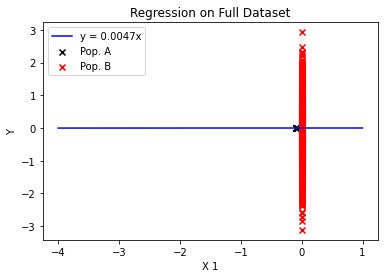

In [86]:
# Scatter plots
plt.scatter(x1_0, y1, marker='x', color='black', label='Pop. A')
plt.scatter(x2_0, y2, marker='x', color='r', label='Pop. B')
# Line plot
x_values = range(-4, 2)  # Range of x values for the line
y_values = [ 0.000449 * x for x in x_values]  # Corresponding y values for the line
plt.plot(x_values, y_values, color='blue', label='y = 0.0047x')  # Plot the line

# Labels and legend
plt.xlabel('X 1')
plt.ylabel('Y')
plt.title('Regression on Full Dataset')
plt.legend()

# Show the plot
plt.show()

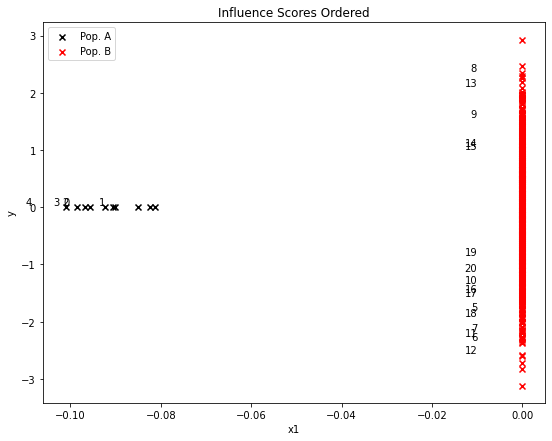

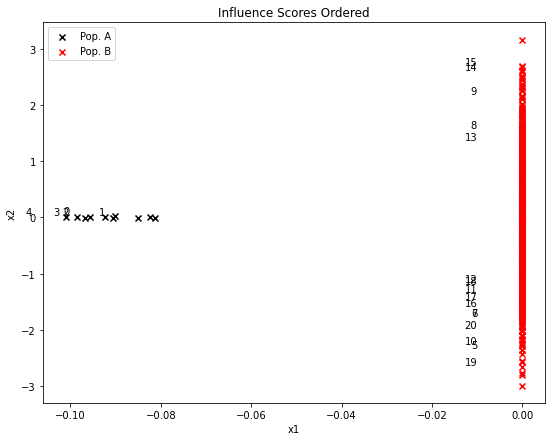

<Figure size 648x504 with 0 Axes>

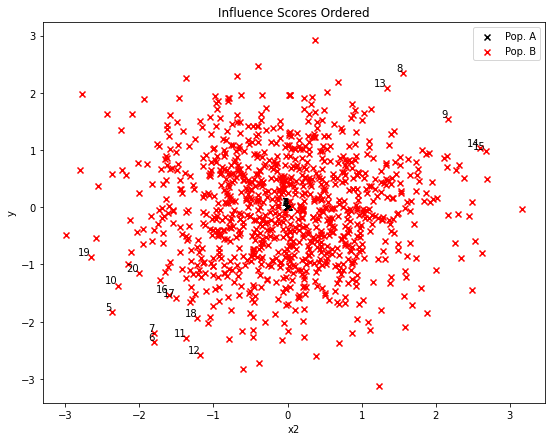

In [87]:
### III. Plot coordinates by AMIP drop order.
plt.figure(figsize=(9, 7))

plt.scatter(orig_df[:10]['x1'], orig_df[:10]['y'], marker='x', color='black', label='Pop. A') # pop A
plt.scatter(orig_df[10:]['x1'], orig_df[10:]['y'], marker='x', color='r', label='Pop. B') # pop B

    
# Add dropped order positioned by each point
for index, row in sorted_if_df.iterrows():
    if row['sorted_idx'] <= 20:
        plt.text(row['x1']-0.01, row['y'], int(row['sorted_idx']), ha='right', va='bottom')

        

plt.xlabel('x1')
plt.ylabel('y')
plt.title('Influence Scores Ordered')
plt.legend()
plt.show()

plt.figure(figsize=(9, 7))

plt.scatter(orig_df[:10]['x1'], orig_df[:10]['x2'], marker='x', color='black', label='Pop. A') # pop A
plt.scatter(orig_df[10:]['x1'], orig_df[10:]['x2'], marker='x', color='r', label='Pop. B') # pop B
   
# Add dropped order positioned by each point
for index, row in sorted_if_df.iterrows():
    if row['sorted_idx'] <= 20:
        plt.text(row['x1']-0.01, row['x2'], int(row['sorted_idx']), ha='right', va='bottom')


plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Influence Scores Ordered')
plt.legend()
plt.show()

plt.figure(figsize=(9, 7))

plt.figure(figsize=(9, 7))

plt.scatter(orig_df[:10]['x2'], orig_df[:10]['y'], marker='x', color='black', label='Pop. A') # pop A
plt.scatter(orig_df[10:]['x2'], orig_df[10:]['y'], marker='x', color='r', label='Pop. B') # pop B

    
# Add dropped order positioned by each point
for index, row in sorted_if_df.iterrows():
    if row['sorted_idx'] <= 20:
        plt.text(row['x2'], row['y'], int(row['sorted_idx']), ha='right', va='bottom')


plt.xlabel('x2')
plt.ylabel('y')
plt.title('Influence Scores Ordered')
plt.legend()
plt.show()

### VI. What would happen in a 1D case; do we need 2D in order for the highest influence points to belong in the larger population? 


In [88]:
np.random.seed(0)

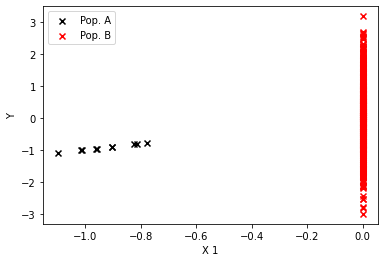

In [89]:
x1 = np.random.normal(-1, 0.1, num_observations_pop_1)
x2 = np.random.normal(0, 0, num_observations_pop_2)
x = np.append(x1, x2, axis=0)

# Generating the Y values.
y1 = x1
y2 = np.random.randn(1, num_observations_pop_2) # No(0, 1)
y2 = y2[0] # format results of np.randn draw.
y = np.concatenate([y1, y2], axis=0)  # All y samples

# X1 vs Y
plt.scatter(x1, y1, marker='x', color='black', label='Pop. A')
plt.scatter(x2, y2, marker='x', color='r', label='Pop. B')
plt.xlabel('X 1')
plt.ylabel('Y')
plt.legend()

plt.show()

In [90]:
# II. Perform the regression.
lr = LinearRegression(x=x.T, y=y)
lr.fit()

print(
    f"Estimated beta1 with full dataset: {lr.beta[0]}"
)  # We care about first coefficient (pop A: y is perfectly correlated (slope=1) with x1.)

modified_lr = LinearRegression(x=x2.T, y=y2)
modified_lr.fit()
print(
    f"Estimated beta2 with subset dropped: {modified_lr.beta[0]}"
)

# III. Compute influence scores for first coefficient.
scores = -lr.influence_scores()[0] # effect of removing a data point.

# III. Compute influence scores for first coefficient.
scores = -lr.influence_scores()[0] # effect of removing a data point.
print("A", np.mean(scores[:10]), "B", np.mean(scores[10:1000]))
print("A", np.min(scores[:10]), "B", np.max(scores[10:1000]))

### Leverage and Residual
residuals = lr.residual()
print("residuals", residuals[:10])
leverages = lr.leverage_scores()
print("leverages", leverages[:10])

# Get indices that sort them in ascending order (influence scores are negative, so the largest magnitude scores appear first.)
inds = np.argsort(scores)

print("inds", inds[:10])
original_inds = inds

# Sort the scores.
sorted_scores = scores[inds]
# print("sorted_scores", sorted(scores)[:10])
original_sorted_scores = sorted_scores
print("original_sorted_scores:", original_sorted_scores[:10])

LinAlgError: 1-dimensional array given. Array must be two-dimensional